In [3]:
#se importa findspark y se inicializa
 # Inicializa findspark para integrar PySpark con Python
import findspark
findspark.init()
# Importar pandas para manipulación de datos tabulares
import pandas as pd

# Importar PySpark y componentes específicos de PySpark SQL
import pyspark
from pyspark.sql import SparkSession  # Para crear una sesión de Spark
from pyspark.sql import functions as f  # Importar funciones SQL de PySpark
from pyspark.sql.types import *

# Importar bibliotecas para visualización
import pandas as pd
import seaborn as sns  # Biblioteca de visualización basada en Matplotlib
import matplotlib.pyplot as plt  # Biblioteca principal para gráficos en Python

# Configurar Matplotlib para que las gráficas se muestren en el notebook
%matplotlib inline

In [4]:
#Iniciar la sesion en sparl
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("graficos") \
    .getOrCreate()

In [5]:
#lectura de los datos de csv en carpeta 
b_data = spark.read.csv(
    r'C:\Users\rc_sh\OneDrive\Escritorio\BID-DATA&IA\CSV\stocks_price_final.csv', 
    sep=',',  # Especifica el separador de campos
    header=True,  # Indica que el archivo CSV tiene una fila de encabezado
    inferSchema=True  # Opcional: Inferir automáticamente el esquema de los datos
)
b_data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: date (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [6]:
#definir estructura de datos
#indicar el esquema manualmente, decir que es un strucfield(nombre de variable , tipo de dato, si se puede poner a nulo true o false
data_schema=[
            StructField('_c0', IntegerType(), True),
            StructField('sympol', StringType(), True),
            StructField('data', DateType(), True),
            StructField('open', DoubleType(), True),
            StructField('high', DoubleType(), True),
            StructField('low', DoubleType(), True),
            StructField('close', DoubleType(), True),
            StructField('volume', IntegerType(), True),
            StructField('adjusted', DoubleType(), True),
            StructField('marker.cap', StringType(), True),
            StructField('sector', StringType(), True),
            StructField('industry', StringType(), True),
            StructField('exchange', StringType(), True),           
]

final_struc=StructType(fields=data_schema)

In [7]:
data = spark.read.csv(
    r'C:\Users\rc_sh\OneDrive\Escritorio\BID-DATA&IA\CSV\stocks_price_final.csv', 
    sep=',',  # Especifica el separador de campos
    header=True,  # Indica que el archivo CSV tiene una fila de encabezado
    schema= final_struc 
)
b_data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: date (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [8]:
data.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|sympol|      data|     open|     high|      low|    close| volume| adjusted|marker.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [9]:
#oara rebinbrar varuabkes
data = data.withColumnRenamed('marker.cap', 'market_cap')


In [10]:
#devuelve esquema de datos
data.schema

StructType([StructField('_c0', IntegerType(), True), StructField('sympol', StringType(), True), StructField('data', DateType(), True), StructField('open', DoubleType(), True), StructField('high', DoubleType(), True), StructField('low', DoubleType(), True), StructField('close', DoubleType(), True), StructField('volume', IntegerType(), True), StructField('adjusted', DoubleType(), True), StructField('market_cap', StringType(), True), StructField('sector', StringType(), True), StructField('industry', StringType(), True), StructField('exchange', StringType(), True)])

In [11]:
data.dtypes

[('_c0', 'int'),
 ('sympol', 'string'),
 ('data', 'date'),
 ('open', 'double'),
 ('high', 'double'),
 ('low', 'double'),
 ('close', 'double'),
 ('volume', 'int'),
 ('adjusted', 'double'),
 ('market_cap', 'string'),
 ('sector', 'string'),
 ('industry', 'string'),
 ('exchange', 'string')]

In [12]:
#devuelve las filas que se le indica
data.head(3)

[Row(_c0=1, sympol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, sympol='TXG', data=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, sympol='TXG', data=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')]

In [13]:
data.show(3)

+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|sympol|      data|     open|  high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|  58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|  56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
only showing top 3 rows



In [14]:
data.first()

Row(_c0=1, sympol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')

In [15]:
#calcula las estadisticas de resumen de las diferentes columnas de tipo numerico
data.describe().show()

+-------+-----------------+-------+------------------+------------------+------------------+------------------+------------------+------------------+----------+----------------+--------------------+--------+
|summary|              _c0| sympol|              open|              high|               low|             close|            volume|          adjusted|market_cap|          sector|            industry|exchange|
+-------+-----------------+-------+------------------+------------------+------------------+------------------+------------------+------------------+----------+----------------+--------------------+--------+
|  count|          1729034|1729034|           1726301|           1726301|           1726301|           1726301|           1725207|           1726301|   1729034|         1729034|             1729034| 1729034|
|   mean|         864517.5|   NULL|15070.071703341051| 15555.06726813709|14557.808227578987| 15032.71485433071|1397692.1627885813|14926.109688795501|      NULL|        

In [16]:
data.columns

['_c0',
 'sympol',
 'data',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market_cap',
 'sector',
 'industry',
 'exchange']

In [17]:
# recuento de numero de filas en los datos
data.count()

1729034

In [18]:
#devuelve el nuemro distintas de los datos
data.distinct().count()

1729034

In [19]:
#muestra el esquema de los datos
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- sympol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market_cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [20]:
#TRANSFORMACIONES DE COLUMNAS 
#agregar columna date se obtiene al obter al aplicart data en data
data = data.withColumn('date', data.data)
data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|_c0|sympol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|      date|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotec

In [21]:
data=data.withColumnRenamed('date', 'data_changed')
data.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|_c0|sympol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|data_changed|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital 

In [22]:
#elimniar columnas
data=data.drop('data_changed')
data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|sympol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [23]:
#IMPUTAR DATOS FALTANTES
#Eliminar las filas sin valores
#data.na.drop()


In [24]:
#SELECCION DE DATOS CON PYSPARK SQL
#SELECT
#con describe() describe los datos hace un contaje el mena stddv min y max
data.select(['open', 'high', 'low', 'close', 'adjusted']).describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+
|summary|              open|              high|               low|             close|          adjusted|
+-------+------------------+------------------+------------------+------------------+------------------+
|  count|           1726301|           1726301|           1726301|           1726301|           1726301|
|   mean|15070.071703341051| 15555.06726813709|14557.808227578987| 15032.71485433071|14926.109688795501|
| stddev|1111821.8002863203|1148247.1953514954|1072968.1558434262|1109755.9294000624|1101877.6328940126|
|    min|             0.072|             0.078|             0.052|             0.071|         -1.230099|
|    max|      1.60168176E8|      1.61601456E8|      1.55151728E8|      1.58376592E8|      1.57249392E8|
+-------+------------------+------------------+------------------+------------------+------------------+



In [26]:
#filer filtra los datos segun la condicion que se le de 
# se pueden usar con and or not
from pyspark.sql.functions import col, lit


In [30]:
data.filter((col('data') >= lit('2020-01-01')) & (col('data') <= lit('2020-01-31'))).show(5)

+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
|_c0|sympol|      data|     open|     high|      low|    close|volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
| 78|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 79|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 80|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 81|   TXG|2020-01-07|     76.0|77.279999|    75.32|75.980003|182400|75.980003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 82|   TXG|2020-01-08|76.089996|76.949997|72.73

In [ ]:
#BETWEEN
# true o false si los valores basados son verdaderos o falso

In [31]:
data.filter(data.adjusted.between(100.0,500.0)).show(5)

+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
| _c0|sympol|      data|      open|      high|       low|     close|volume|  adjusted|market_cap|       sector|            industry|exchange|
+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
|  93|   TXG|2020-01-24| 95.459999|     101.0| 94.157997|100.790001|328100|100.790001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  94|   TXG|2020-01-27| 99.760002|104.892998| 97.019997|103.209999|334900|103.209999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  95|   TXG|2020-01-28|104.620003|108.269997|103.297997|106.620003|245400|106.620003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|6893|  ABMD|2019-01-02|315.940002|320.709991|307.029999|309.959991|590000|309.959991|   $13.39B|  Health Care|Medical/Dental In...|  NASDAQ|
|6894|

#WHEN
#DEVUELVE 0 O 1
data.select('open', 'close', 
            f.when(data.adjusted >= 200.1, 1).otherwise(0)).show(5)

In [32]:
#de los valores open y close que devuelva los valores si mayor o igual a 200.1, se asigna el valor 1.
#.otherwise(0): Si la condición no se cumple, se asigna el valor 0.
#f.when es una función de PySpark utilizada para evaluar condiciones y generar valores basados en esas condiciones en un DataFrame.
#Forma parte del módulo pyspark.sql.functions,
#que contiene muchas funciones útiles para operar sobre columnas en DataFrames.
data.select('open', 'close', f.when(data.adjusted >= 200.1, 1).otherwise(0)).show(5)

+---------+---------+-----------------------------------------------+
|     open|    close|CASE WHEN (adjusted >= 200.1) THEN 1 ELSE 0 END|
+---------+---------+-----------------------------------------------+
|     54.0|    52.75|                                              0|
|    52.75|    52.27|                                              0|
|52.450001|55.200001|                                              0|
|56.209999|56.779999|                                              0|
|56.849998|     62.0|                                              0|
+---------+---------+-----------------------------------------------+
only showing top 5 rows



In [37]:
#like
#igual que verdadero si las palabras empiezan por B o C y falso si no 
data.select('sector', data.sector.rlike('^[B, C]').alias('Sector String with B or C')).distinct().show()

+--------------------+-------------------------+
|              sector|Sector String with B or C|
+--------------------+-------------------------+
|         Health Care|                    false|
|       Capital Goods|                     true|
|Consumer Non-Dura...|                     true|
|    Public Utilities|                    false|
|   Consumer Durables|                     true|
|             Finance|                    false|
|      Transportation|                    false|
|       Miscellaneous|                    false|
|   Consumer Services|                     true|
|              Energy|                    false|
|    Basic Industries|                     true|
|          Technology|                    false|
+--------------------+-------------------------+



In [38]:
#GROUP BY 
data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().show()

+--------------------+------------------+------------------+------------------+
|            industry|         avg(open)|        avg(close)|     avg(adjusted)|
+--------------------+------------------+------------------+------------------+
|Finance/Investors...| 5.134401785714288| 5.136630739795919| 4.991354066964286|
|       Miscellaneous| 16.38588266938775|16.359879090306126|16.148959322959186|
|Biotechnology: Bi...| 24.80808319232426|24.803587149935417| 24.74507997827317|
|Other Specialty S...| 84.80718810562857|  84.8027655092983| 84.55525036482354|
|Biotechnology: El...| 33.36891734535046| 33.33611913546896| 33.21022605613575|
|Other Consumer Se...| 43.67010744224604|43.658688711464826|43.434989808790206|
|Electric Utilitie...| 41.35569183903102|41.371055593573246| 40.39245735242004|
|        Water Supply| 40.58048308203543| 40.58487374462943| 40.17332791487648|
|               Banks| 21.44122960768001| 21.44016833104001|21.029210073439994|
|Farming/Seeds/Mil...|27.740143444117308

In [43]:
#AGREGATION  utiles para operaciones agragadas en columnas de datos
from pyspark.sql import functions as f

In [47]:
data.groupBy('sector')\
    .agg(f.min('data').alias('From'),
        f.max('data').alias('To'),
        f.min('open').alias('Minimum Opening'),
        f.max('open').alias('Maximum Opening'),
        f.avg('open').alias('Average Opening'),
        f.min('close').alias('Minimum Closing'),
        f.max('close').alias('Maximum Closing'),
        f.avg('close').alias('Average Closing'),
        f.min('adjusted').alias('Minimum Adjusted Closing'),
        f.max('adjusted').alias('Maximum Adjusted Closing'),
        f.avg('adjusted').alias('Average Adjusted Closing')
    ).show(truncate=False)

+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|sector               |From      |To        |Minimum Opening|Maximum Opening|Average Opening   |Minimum Closing|Maximum Closing|Average Closing   |Minimum Adjusted Closing|Maximum Adjusted Closing|Average Adjusted Closing|
+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|Miscellaneous        |2019-01-02|2020-07-22|0.147          |1059.98999     |52.038394969006596|0.1361         |1035.829956    |52.063628549509644|0.1361                  |1035.829956             |51.80973033632301       |
|Health Care          |2019-01-02|2020-07-22|0.072          |186000.0       |119.96763306523246|0.071       

In [49]:
#condiciones de filtrados
data.filter((col('data') >= lit ('2019-01-02')) & (col ('data') <= lit ('2020-01-31')) )\
    .groupBy('sector')\
    .agg(f.min('data').alias('From'),
        f.max('data').alias('To'),
        f.min('open').alias('Minimum Opening'),
        f.max('open').alias('Maximum Opening'),
        f.avg('open').alias('Average Opening'),
        f.min('close').alias('Minimum Closing'),
        f.max('close').alias('Maximum Closing'),
        f.avg('close').alias('Average Closing'),
        f.min('adjusted').alias('Minimum Adjusted Closing'),
        f.max('adjusted').alias('Maximum Adjusted Closing'),
        f.avg('adjusted').alias('Average Adjusted Closing')
    ).show(truncate=False)

    

+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|sector               |From      |To        |Minimum Opening|Maximum Opening|Average Opening   |Minimum Closing|Maximum Closing|Average Closing   |Minimum Adjusted Closing|Maximum Adjusted Closing|Average Adjusted Closing|
+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|Miscellaneous        |2019-01-02|2020-01-31|0.16           |690.0          |51.51619596530087 |0.16           |691.099976     |51.54953412269036 |0.16                    |691.099976              |51.21050733851895       |
|Health Care          |2019-01-02|2020-01-31|0.072          |186000.0       |146.7756197567624 |0.071       

In [52]:
#spark.sql('select * from temp_table where id = 1').show() se pueden tambien con consultas sql

In [55]:
#VISUALIZACION DE DATOS
#primero se agregan los datos para visualizarlos 
#Después de seleccionar las columnas necesarias,
#el DataFrame se agrupa por la columna 'sector' utilizando el método groupBy.
#Luego, se calcula la media de cada columna numérica ('open', 'close' y 'adjusted') 
#dentro de cada grupo utilizando el método mean().
sec_df = data.select(['sector','open', 'close', 'adjusted']).groupBy('sector').mean().toPandas()

In [56]:
sec_df

,sector,avg(open),avg(close),avg(adjusted)
0,Miscellaneous,52.038395,52.063629,51.809730
1,Health Care,119.967633,119.078061,118.973948
2,Public Utilities,35.580777,35.585282,34.730156
3,Energy,24.456590,24.427350,23.684714
4,Consumer Non-Durables,43.328603,43.330386,42.817625
5,Finance,37.774667,37.779002,37.100285
6,Basic Industries,266410.354701,265750.361367,263865.510703
7,Capital Goods,60.488544,60.516555,59.975123
8,Technology,49.516045,49.534799,49.252340
9,Consumer Services,55.078867,55.055248,54.361878


<Axes: xlabel='sector'>

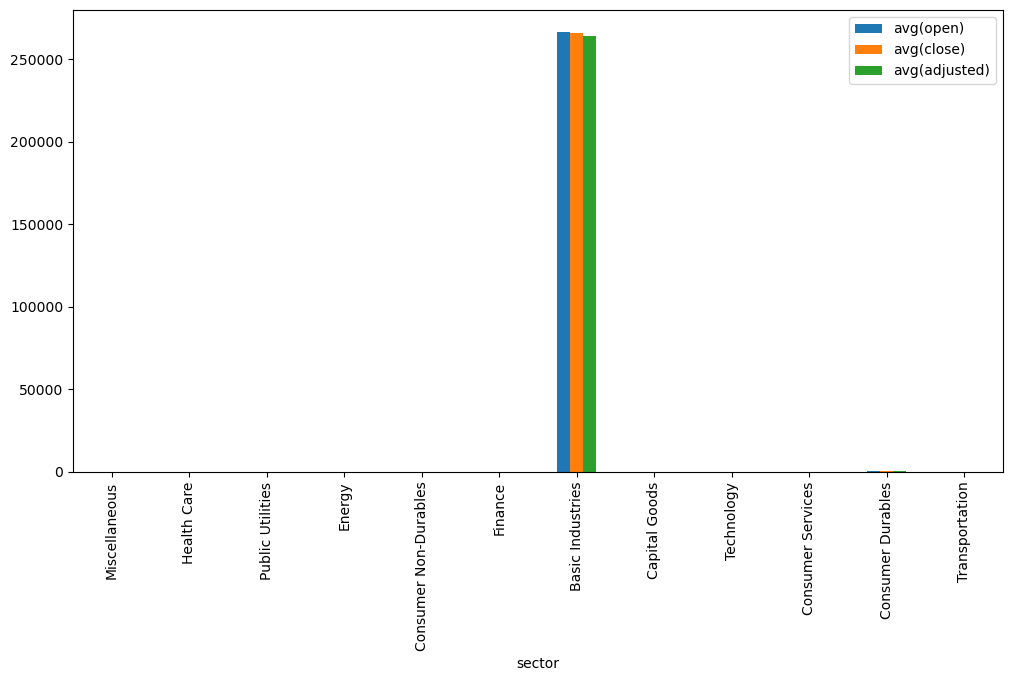

In [60]:
#una vez agregados se pueden visualizar
#sec_df.plot(...): Llama al método plot() del DataFrame de Pandas sec_df para crear el gráfico.
#kind='bar': Especifica que el tipo de gráfico será un diagrama de barras.
#x='sector': Indica que la columna 'sector' se utilizará en el eje x del gráfico.
#y=sec_df.columns.tolist()[1:]: Indica que las columnas restantes del DataFrame sec_df (desde la segunda columna en adelante) se utilizarán en el eje y del gráfico. tolist() convierte el índice de las columnas a una lista, y [1:] excluye la primera columna ('sector').
#figsize=(12,6): Especifica el tamaño de la figura del gráfico como 12 pulgadas de ancho y 6 pulgadas de alto.

sec_df.plot(kind='bar', x='sector', y=sec_df.columns.tolist()[1:], figsize=(12,6))

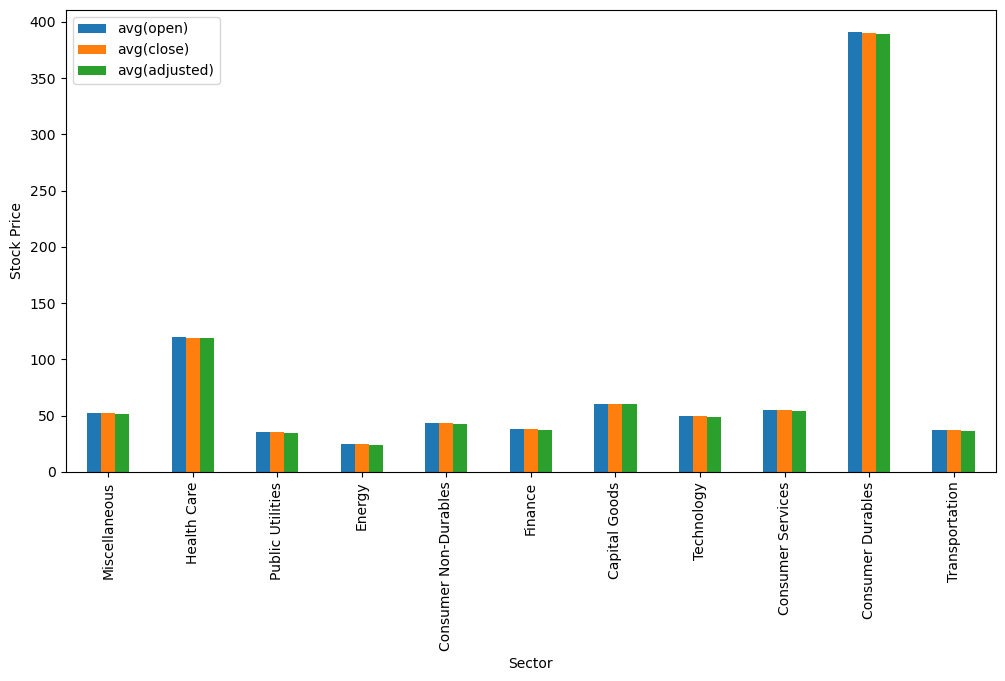

In [61]:
ind= list(range(12))
ind.pop(6) #eliminiar basic industries
sec_df.iloc[ind ,:].plot(kind='bar', x='sector', y=sec_df.columns.tolist()[1:], figsize=(12,6), 
                         ylabel='Stock Price', xlabel='Sector')
plt.show()

In [68]:
industries_x = data.select('industry', 'open', 'close', 'adjusted').groupBy('industry').mean().toPandas()
industries_x.head()

,industry,avg(open),avg(close),avg(adjusted)
0,Finance/Investors Services,5.134402,5.136631,4.991354
1,Miscellaneous,16.385883,16.359879,16.148959
2,Biotechnology: Biological Products (No Diagnos...,24.808083,24.803587,24.745080
3,Other Specialty Stores,84.807188,84.802766,84.555250
4,Biotechnology: Electromedical & Electrotherape...,33.368917,33.336119,33.210226


<Axes: ylabel='industry'>

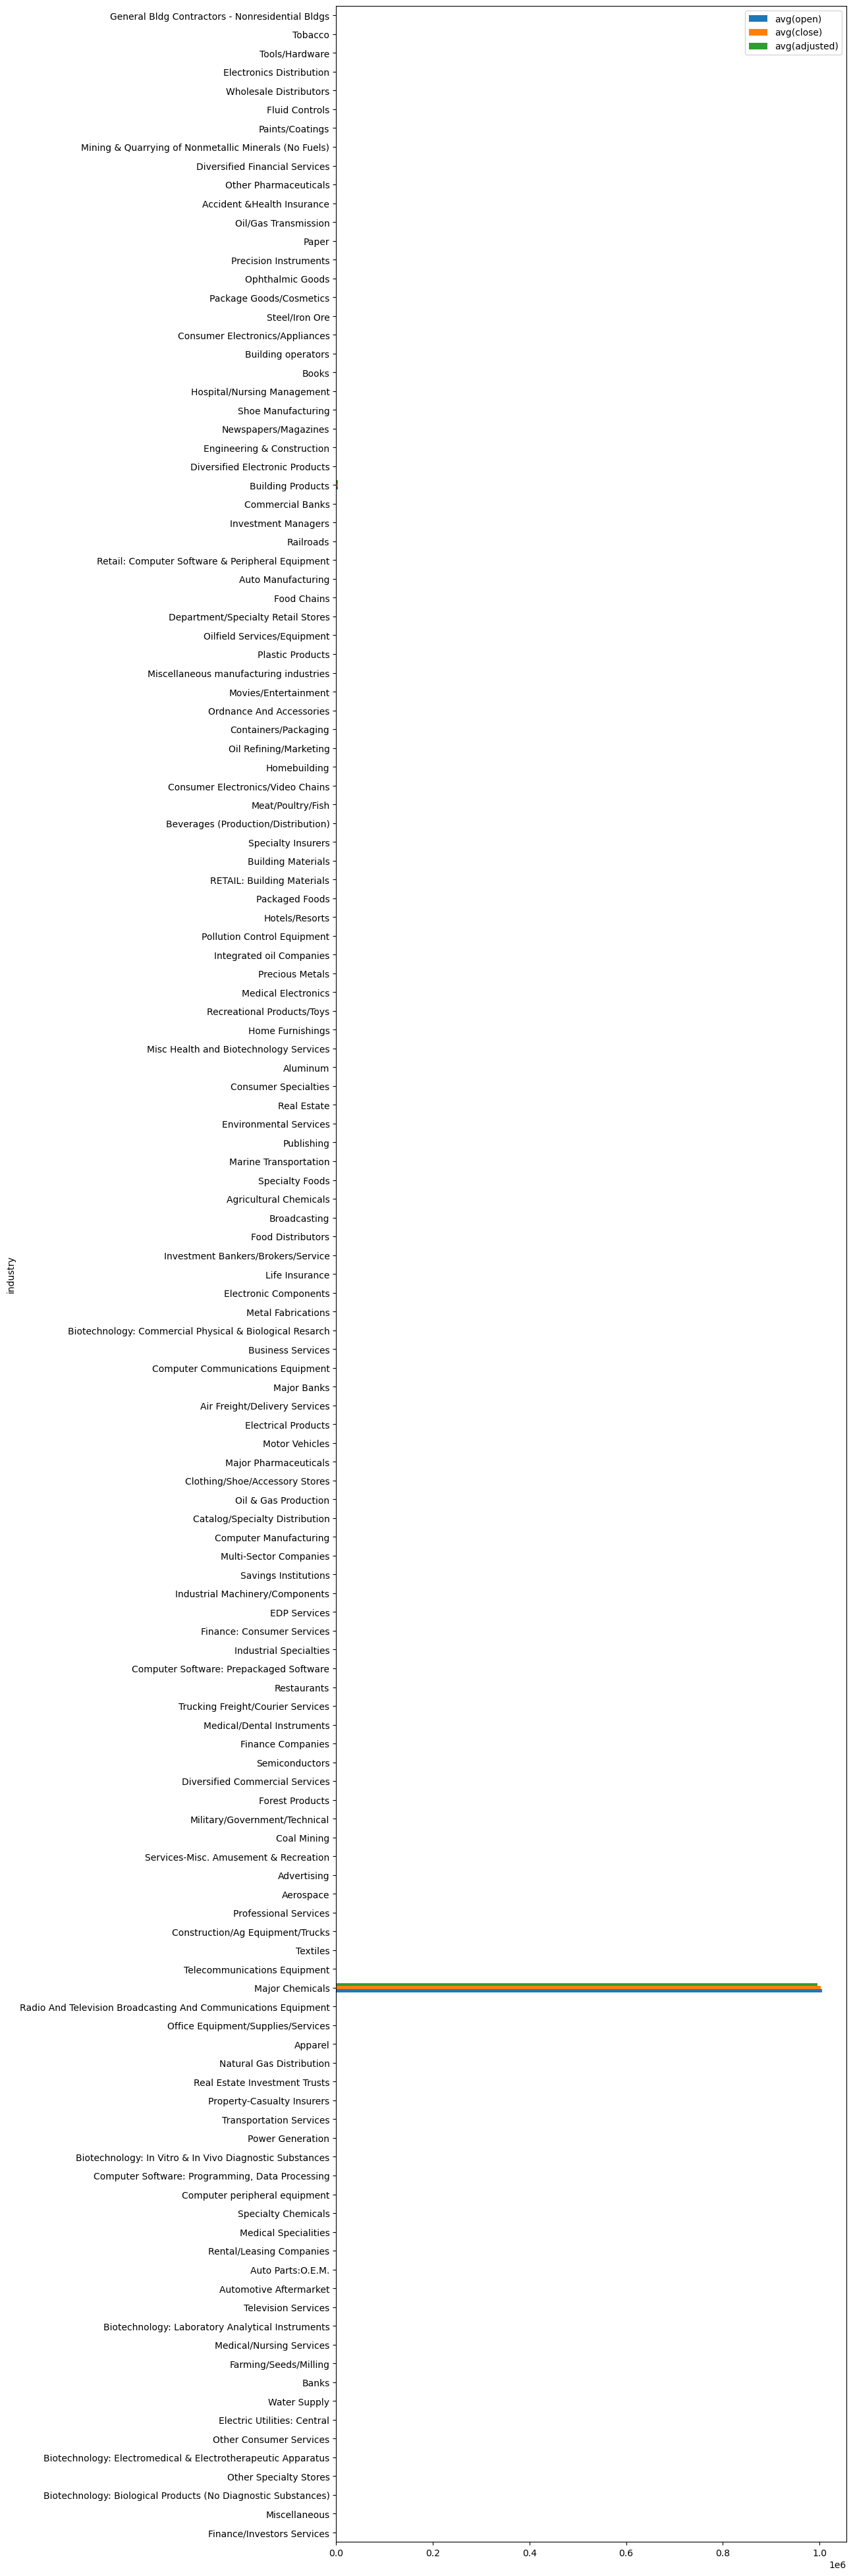

In [70]:
industries_x.plot(kind='barh', x='industry', y=industries_x.columns.tolist()[1:], figsize=(10,50))

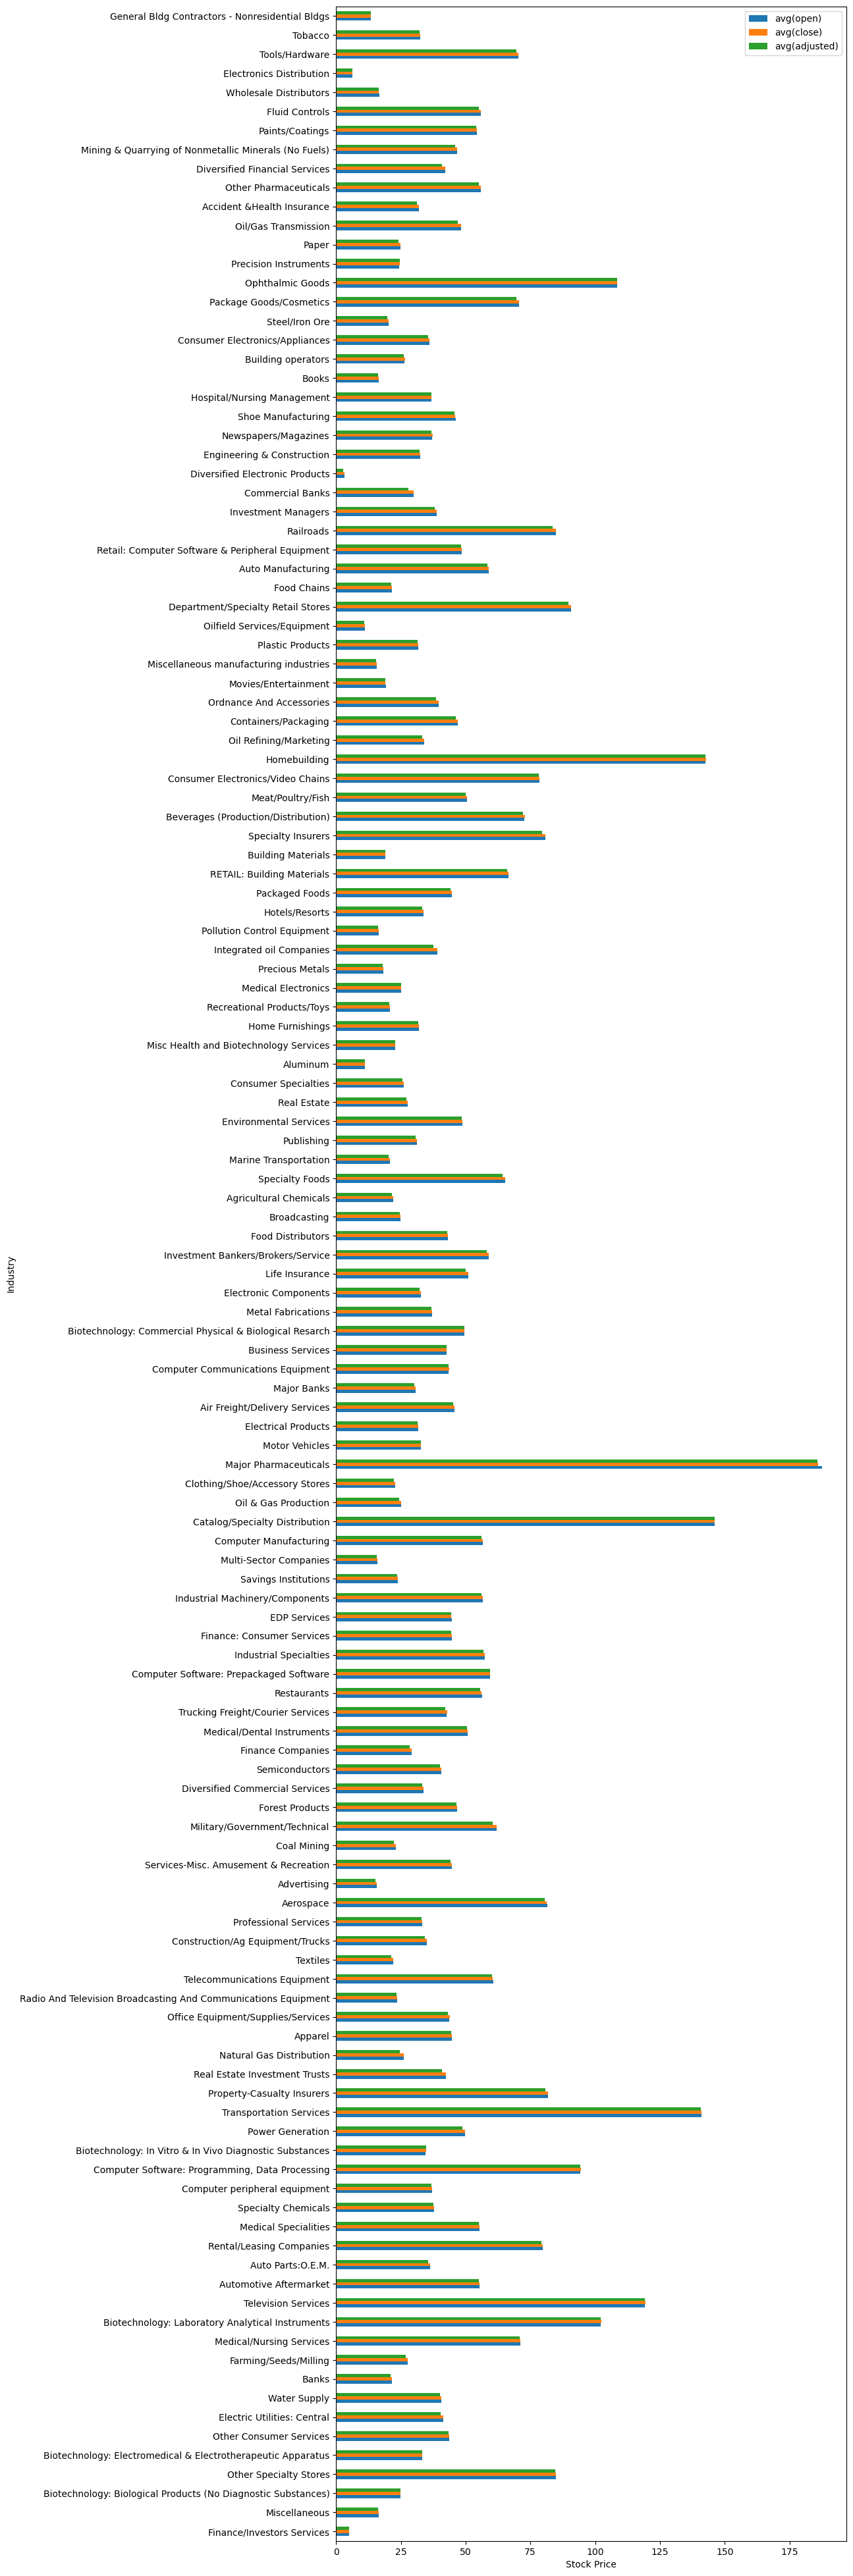

In [76]:
q = industries_df[(industries_df.industry != 'Major Chemicals') & (industries_df.industry != 'Building Products')]
q.plot(kind='barh', x='industry', y=q.columns.tolist()[1:], figsize=(10,50), xlabel='Stock Price', ylabel= 'Industry')
plt.show()


In [77]:
tech=data.where(col('sector') == 'Technology').select('data', 'open', 'close', 'adjusted')
tech.show()

+----------+----+-----+--------+
|      data|open|close|adjusted|
+----------+----+-----+--------+
|2019-01-02|8.51| 8.55|    8.55|
|2019-01-03| 8.5| 8.59|    8.59|
|2019-01-04|8.72| 8.88|    8.88|
|2019-01-07|8.88| 8.86|    8.86|
|2019-01-08|8.93|  9.4|     9.4|
|2019-01-09|9.46| 9.43|    9.43|
|2019-01-10|9.41|  9.4|     9.4|
|2019-01-11|9.37| 9.51|    9.51|
|2019-01-14|9.45| 9.48|    9.48|
|2019-01-15| 9.5| 9.52|    9.52|
|2019-01-16|9.53| 9.52|    9.52|
|2019-01-17|9.22|  9.5|     9.5|
|2019-01-18|9.57| 9.41|    9.41|
|2019-01-22|9.31|  8.9|     8.9|
|2019-01-23|8.93| 8.83|    8.83|
|2019-01-24|8.84| 8.73|    8.73|
|2019-01-25| 8.8| 8.93|    8.93|
|2019-01-28|8.87| 8.83|    8.83|
|2019-01-29|8.82| 8.83|    8.83|
|2019-01-30| 8.9| 8.74|    8.74|
+----------+----+-----+--------+
only showing top 20 rows



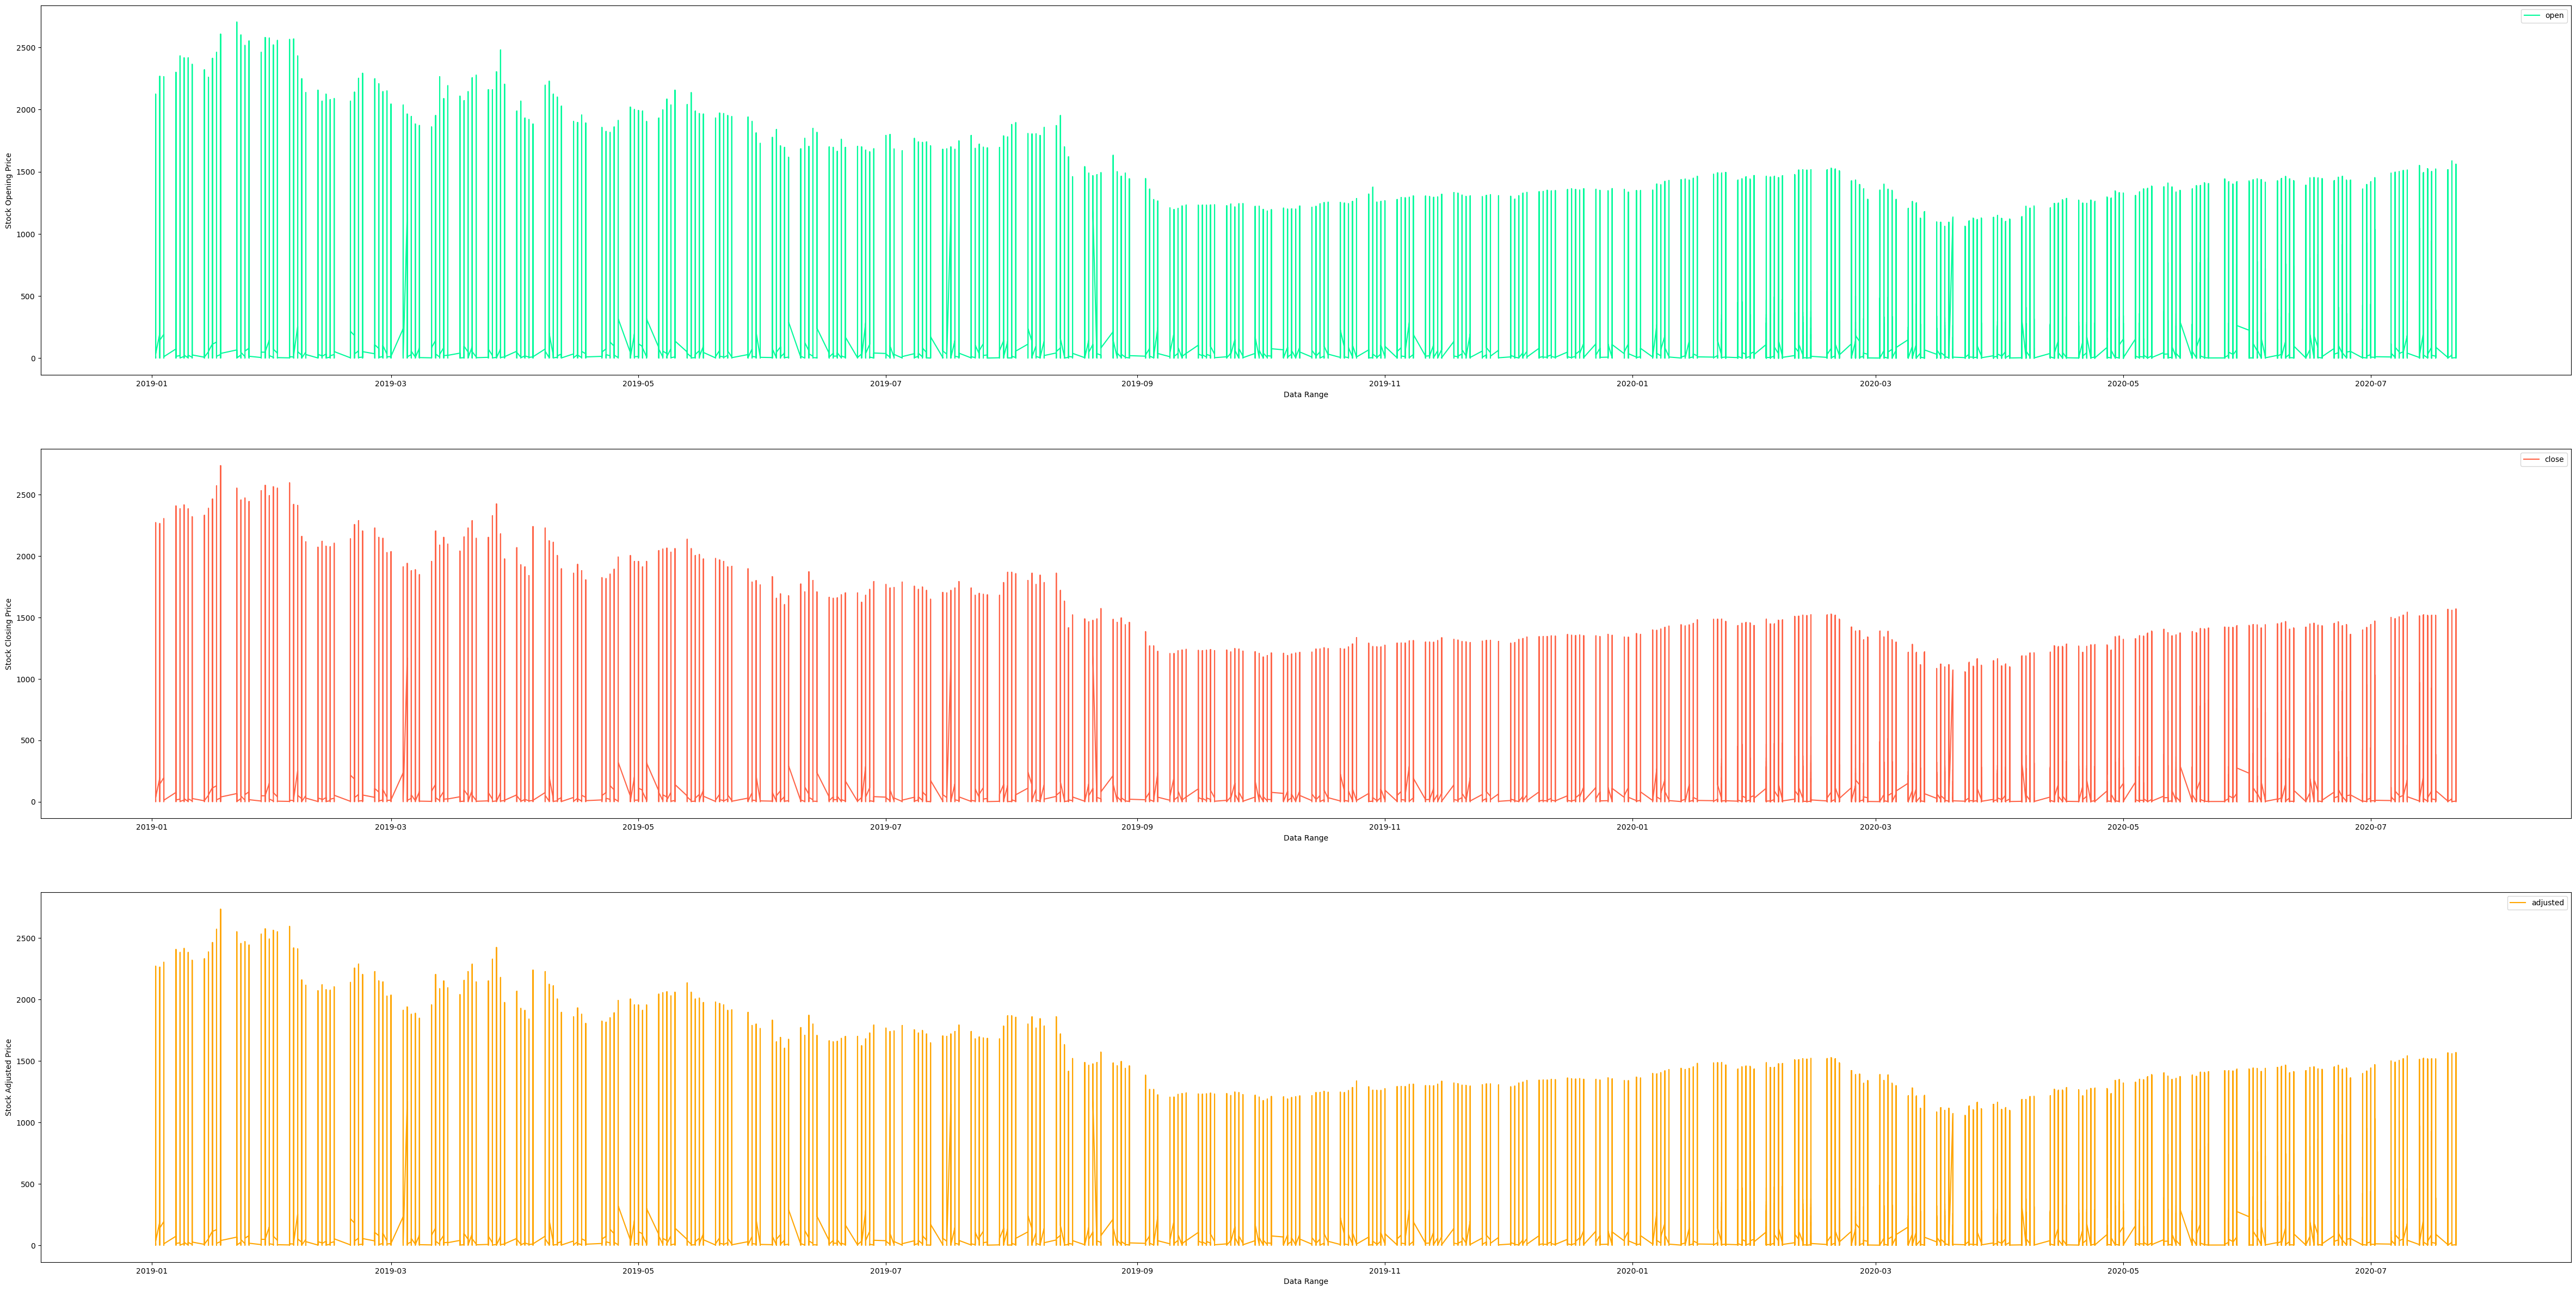

In [79]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(60,30))

tech.toPandas().plot(kind='line', x='data', y='open', xlabel='Data Range', ylabel='Stock Opening Price', ax=axes[0], color='mediumspringgreen')
tech.toPandas().plot(kind='line', x='data', y='close', xlabel='Data Range', ylabel='Stock Closing Price', ax=axes[1], color='tomato')
tech.toPandas().plot(kind='line', x='data', y='adjusted', xlabel='Data Range', ylabel='Stock Adjusted Price', ax=axes[2], color='orange')

plt.show()


In [ ]:
#LEER Y GUARDAR DATOS
#CSV
data.write.csv( r'C:\Users\rc_sh\OneDrive\Escritorio\BID-DATA&IA\CSV\dataset')
#JOSN
data.write.save('dataset.json', format='json')
#PAEQUET
data.write.save('dataset.parquet' , format='parquet')

#GUARDAR DATOS ESPECIFICOS
#CSV
data.select(['data', 'open', 'close', 'adjusted']) \
    .write.csv(r'C:\Users\rc_sh\OneDrive\Escritorio\BID-DATA&IA\CSV\dataset.csv')

#JOSN
data.select(['data', 'open', 'close', 'adjusted']) \
    .write.save('dataset.json', format='json')
#PAEQUET
data.select(['data', 'open', 'close', 'adjusted']) \
    .write.save('dataset.parquet' , format='parquet')